# Autoencoders
For today's exercise we are going to be implementing autoencoders, one cool implementation can be found [here](https://medium.com/@sorenlind/a-deep-convolutional-denoising-autoencoder-for-image-classification-26c777d3b88e) where a person uses autoencoders to get unnoisy images from magic the gathering cards. 

For this I have used the most common starter example for autoencoders that can be found using the mnist dataset. Remember that the autoencoder is doing something similar to the following:

![image](https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_denoising_autoencoder_overview.png)

As in previews weeks the code is already given, but I would ask you to do the next things:

* Add noise to the input images and see how your autoencoder works with these.
* Add more dense layers to your autoencoder model (hint: you can use: x = Dense(128, activation='relu')(input_img) as your initial layer and then instead of the "encoded" variable as you have it right now you can change input_img for x)
* create an autoencoder that uses CNNs


In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adadelta, SGD
import matplotlib.pyplot as plt

### Read the data and flatten it
In this case, first we are going to use dense layers, here is another way to flattern your data before giving it to the dense layer.

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Create your autoencoder
We can now create the model for the autoencoder, in this case is a very simple one where of an input layer, one hiden layer (the encoded part) and an output later (the decoded part).

In [4]:
# this is the size of our encoded representations
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

### The encoder and decoder models
This models we are going to use them later to test the results.


In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

### Time to train our model
Try different optimizers, deffinitely SGD is not the best for this task. you should be able to ger good results with the setup given

In [6]:
opt = SGD()
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.6935 - val_loss: 0.6922
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6919 - val_loss: 0.6906
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6902 - val_loss: 0.6888
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6883 - val_loss: 0.6867
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6862 - val_loss: 0.6841
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6835 - val_loss: 0.6809
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6801 - val_loss: 0.6766
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6756 - val_loss: 0.6709
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6695 - val_loss: 0.6633
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6614 - val_loss: 0.6531

### Now let's test our Autoencoder!
One important thing to notice is how reshape is used to rearrange the image plot it.

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

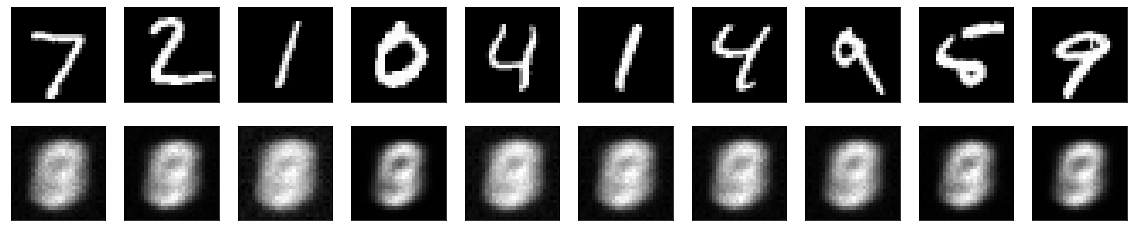

In [9]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()